In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
date = datetime.datetime.today().strftime("%Y-%m-%d %H:%M:%S")

In [2]:
df = pd.read_excel('C:/Users/Test/Documents/DS/notebooks/udocan/Register_09.04.2023.xlsx')

In [3]:
# Срок ответов / среднее арифметическое
df['Длительность отработки запроса'].mean()

12.071249076127124

In [4]:
# Срок ответов / медиана
df['Длительность отработки запроса'].median()

6.0

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Длительность отработки запроса', ylabel='Density'>

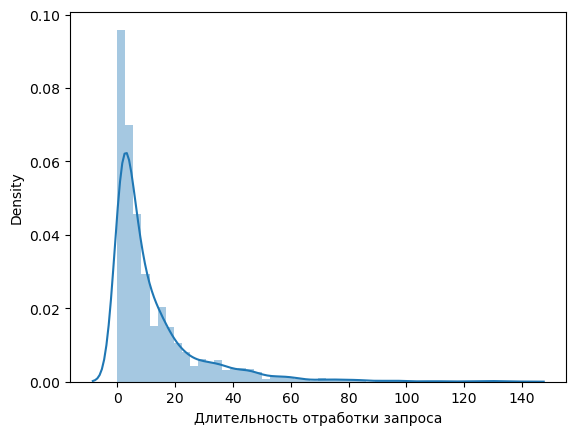

In [5]:
# Графика по срокам ответов
sns.distplot(df['Длительность отработки запроса'], kde = True)

In [5]:
# Реестр закрытых
df_closed = df.query("TQS_Состояние=='Закрыт'")

In [6]:
df_closed.shape

(6765, 93)

In [16]:
date

'2023-03-11 19:25:53'

In [ ]:
df['year'] = df['ArrivalDate'].dt.year
df['month'] = df['ArrivalDate'].dt.month

Расклад по закрытым запросам

In [7]:
# Группировка по дням
df_closed_per_day = df_closed.groupby('TQS_Закрыт', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Закрыт' : 'date', 'TQS_Состояние' : 'closed'})
df_closed_per_day.head(3)

,date,closed
0,2022-04-01,1
1,2022-04-05,2
2,2022-04-07,1


In [10]:
# Количество наблюдений (дней)
df_closed_per_day.shape[0]

339

In [8]:
# Топ 10 дней с лучшим выхлопом
df_closed_per_day.sort_values('closed', ascending=False).head(10)

,date,closed
302,2023-02-16,67
311,2023-02-25,64
289,2023-02-03,57
212,2022-11-18,55
317,2023-03-03,54
144,2022-09-10,53
307,2023-02-21,52
318,2023-03-04,50
213,2022-11-19,49
274,2023-01-19,49


In [9]:
# Медиана по закрытию в день
df_closed_per_day.closed.median()

16.0

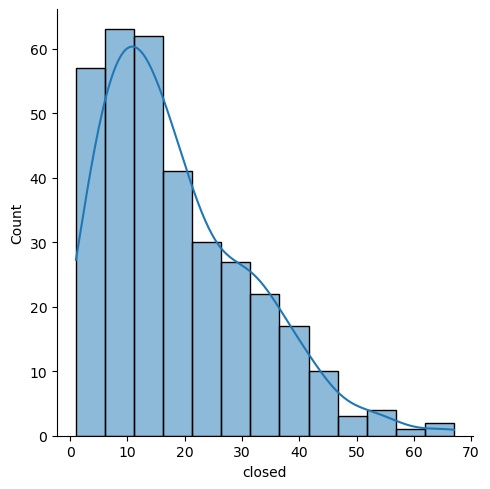

In [13]:
# Грубая картинка по распределению количества закрытых запросов в день
sns.displot(df_closed_per_day.closed, kde = True)

In [4]:
# График количество закрытых запросов / день. Оригинал, без преобразований
sns.lineplot(df_closed_per_day.date, df_closed_per_day.closed)

NameError: name 'df_closed_per_day' is not defined

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

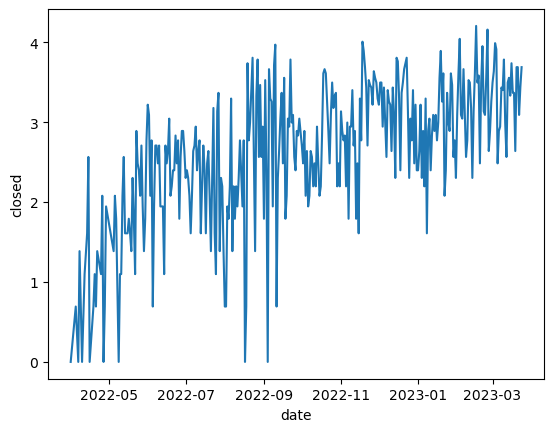

In [48]:
# График количество закрытых запросов / день. Через логарифм
sns.lineplot(df_closed_per_day.date, np.log(df_closed_per_day.closed))

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

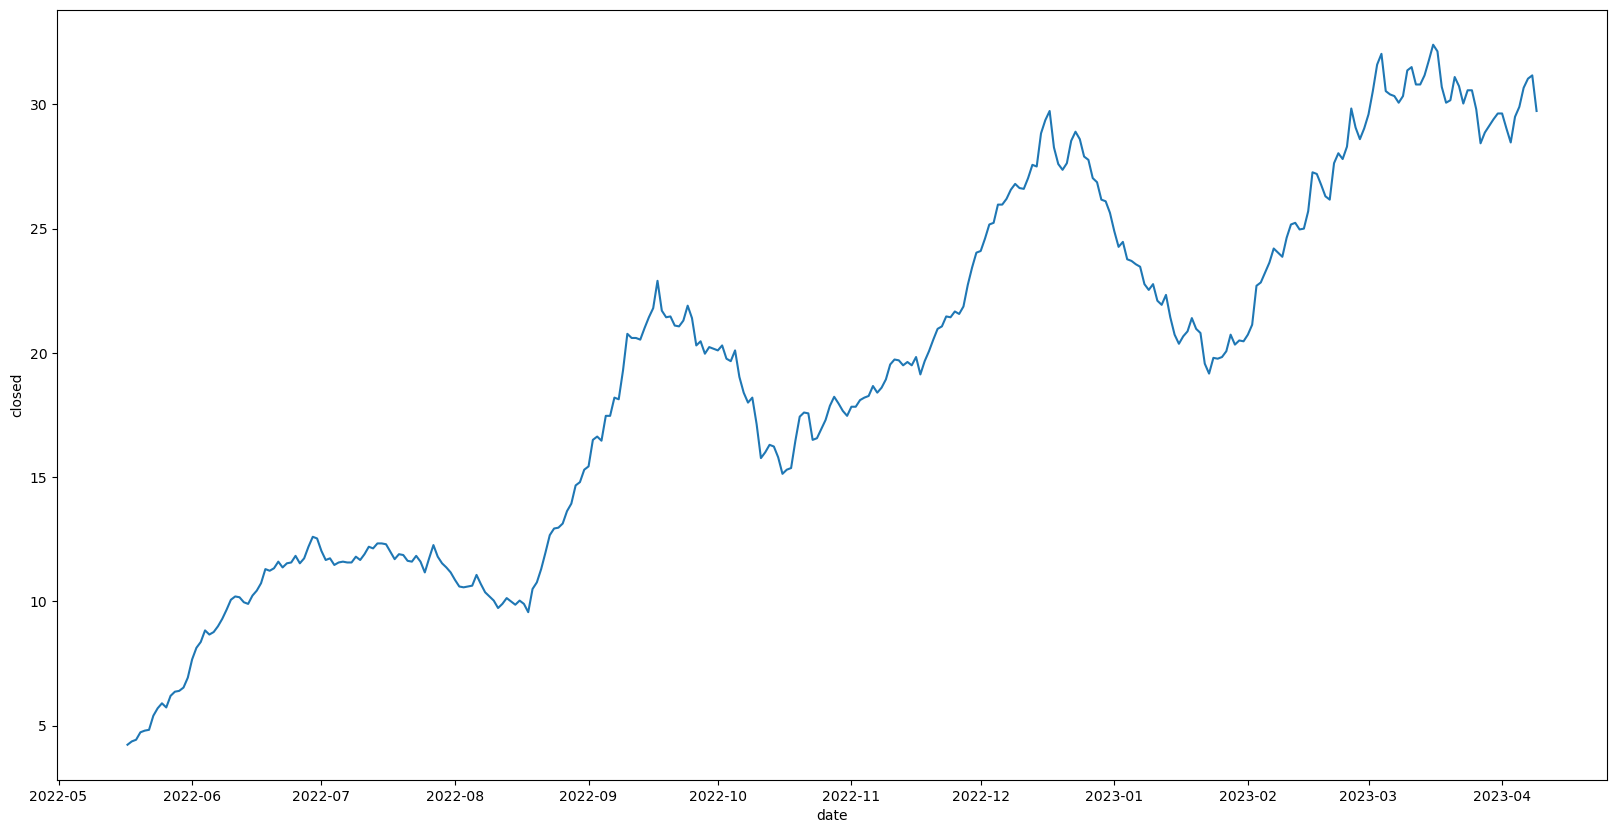

In [10]:
# График количество закрытых запросов / день. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_closed_per_day.date, df_closed_per_day.closed.rolling(window=30).mean())

Расклад по новым запросам

In [11]:
# Группировка по дням
df_new_per_day = df.groupby('TQS_Создан', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Создан' : 'date', 'TQS_Состояние' : 'new'})
df_new_per_day.head(3)

,date,new
0,2022-03-31,5
1,2022-04-01,8
2,2022-04-02,2


In [16]:
# Количество наблюдений (дней)
df_new_per_day.shape[0]

351

In [17]:
# Топ 10 дней по новым запросам
df_new_per_day.sort_values('new', ascending=False).head(10)

,date,new
191,2022-10-17,51
311,2023-02-14,49
334,2023-03-09,46
180,2022-10-06,46
250,2022-12-15,45
194,2022-10-20,44
342,2023-03-17,42
328,2023-03-03,42
317,2023-02-20,41
195,2022-10-21,40


In [12]:
# Медиана по новым в день
df_new_per_day.new.median()

18.0

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new'>

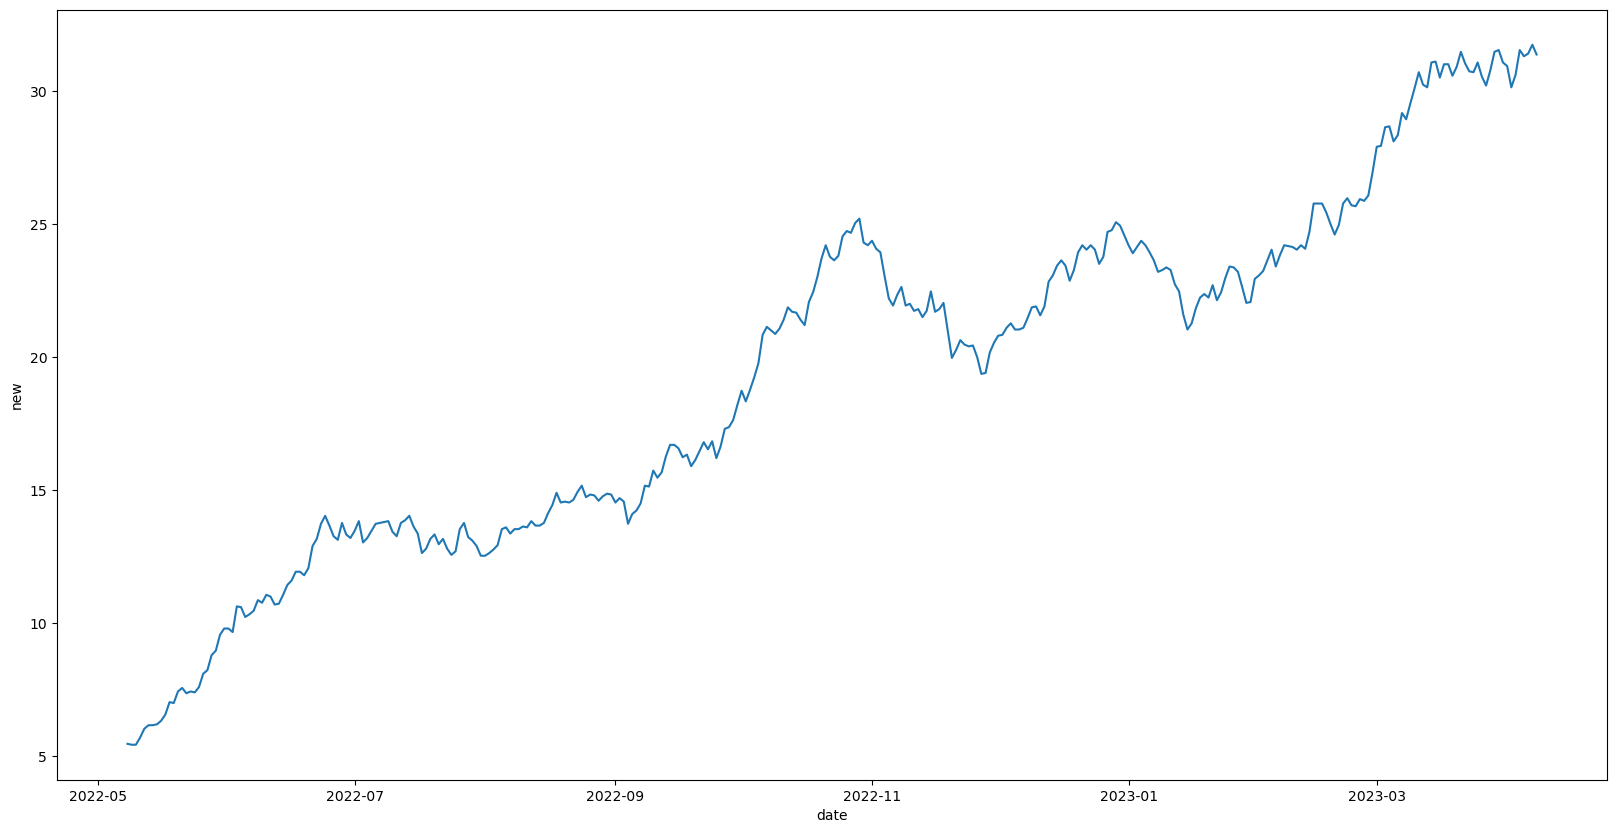

In [13]:
# График количество новых запросов / день. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_new_per_day.date, df_new_per_day.new.rolling(window=30).mean())

Наложение закрытых на полученных

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new'>

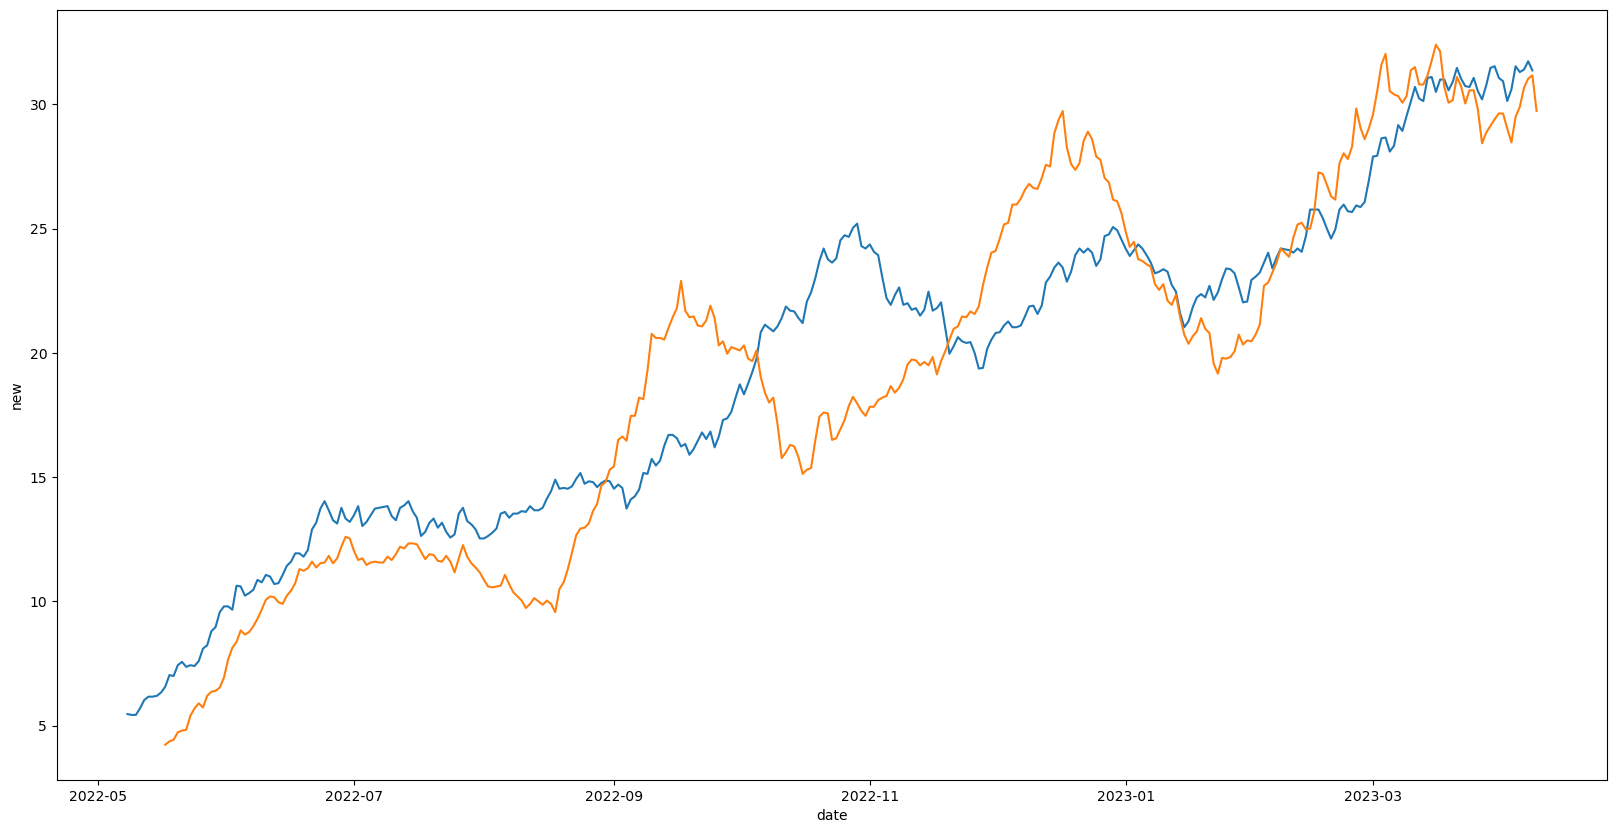

In [14]:
# Ораньжевая линия - закрытые запросы
# Синяя линия - новые запросы
plt.figure(figsize=(20, 10))
sns.lineplot(df_new_per_day.date, df_new_per_day.new.rolling(window=30).mean())
sns.lineplot(df_closed_per_day.date, df_closed_per_day.closed.rolling(window=30).mean())

In [15]:
# Закрытые ПО-1
df_closed_po1 = df_closed[df_closed['TQS_Проектный офис']=='UMCD - ПО-1']
df_closed_po1.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
14,RHI-UM1-PO1-TQS-03570-EQP.xml,Подрядчик,Урамаев Ильфат Бикбулатович,Ренейссанс Хэви Индастрис,4.07 разночтения в чертежах оборудований AA02-...,У1.ТК.03.09-3705-4.07-ТХ,4.07,Оборудование,SMA,СМАРТ-инжиниринг,...,NaN,3573,NaN,NaN,Урамаев Ильфат Бикбулатович,08.04.2023,Элемент,p/um1/TQS,NaN,NaN


In [16]:
# Группировка по дням
df_closed_po1_per_day = df_closed_po1.groupby('TQS_Закрыт', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Закрыт' : 'date', 'TQS_Состояние' : 'closed'})
df_closed_po1_per_day.head(3)

,date,closed
0,2022-04-01,1
1,2022-04-05,2
2,2022-04-07,1


In [17]:
# Медиана по закрытым в день
df_closed_po1_per_day.closed.median()

9.0

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

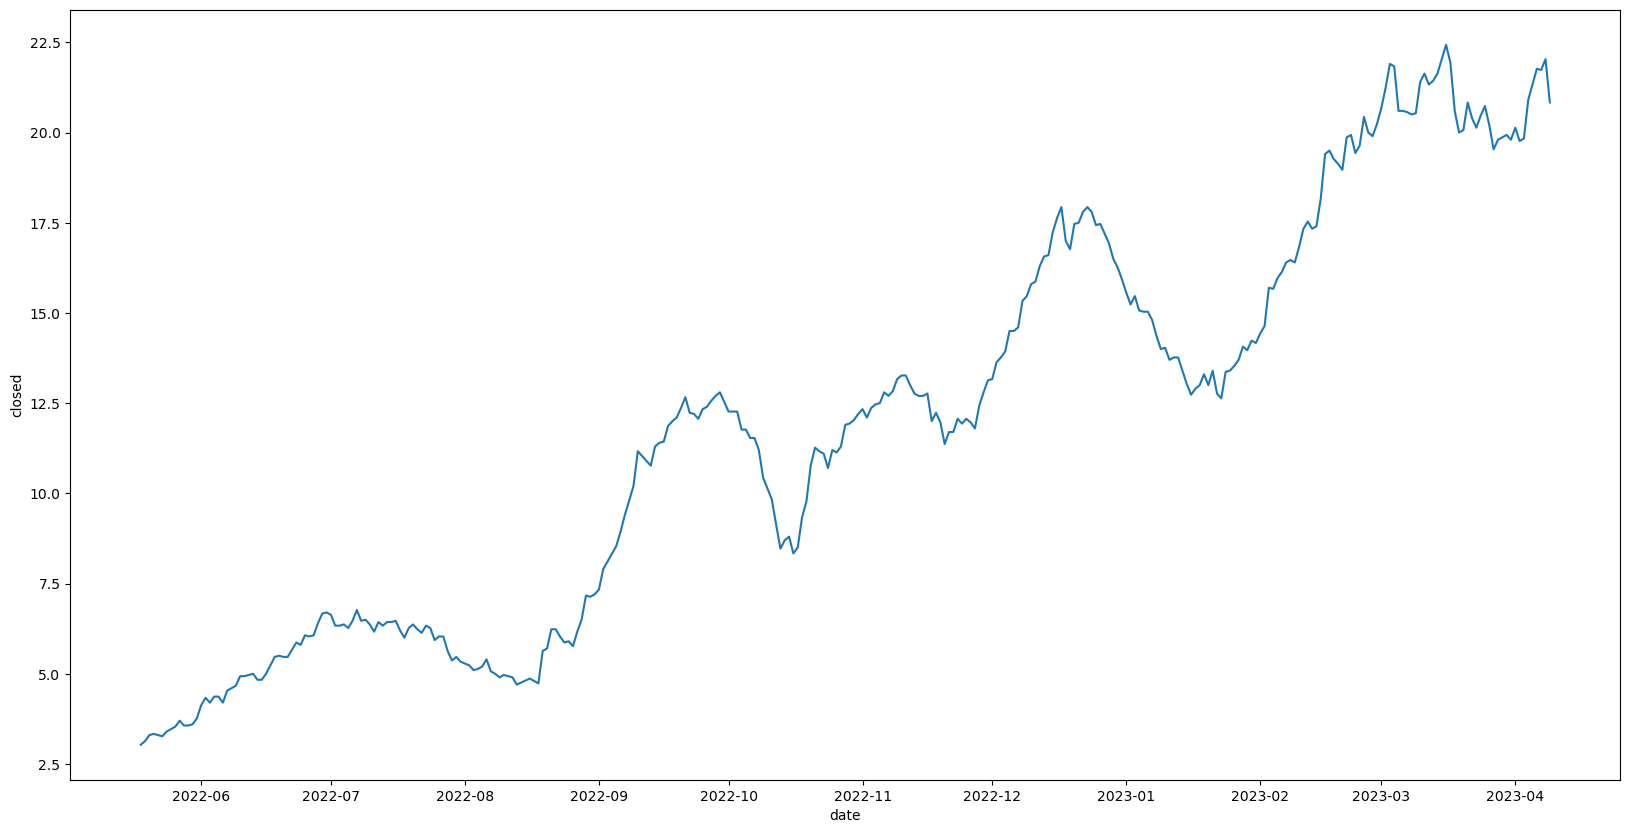

In [18]:
# График количество новых запросов / день. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_closed_po1_per_day.date, df_closed_po1_per_day.closed.rolling(window=30).mean())

In [25]:
# Закрытые ПО-2 / ПО-6
df_closed_po2_6 = df_closed[(df_closed['TQS_Проектный офис']=='UMCD - ПО-2')|(df_closed['TQS_Проектный офис']=='UMCD - ПО-6')]
df_closed_po2_6.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
54,UMCD-UM1-PO6-TQS-03432-AR.xml,Дирекция по строительству,Зладеев Дмитрий Игоревич,"Дирекция по строительству - ПО-6 - ООО ""Удокан...",Отмена оконных блоков,260719-ВП-19.10-АР,19.9,Архитектурные решения,SMA,СМАРТ-инжиниринг,...,NaN,3437,NaN,NaN,Зладеев Дмитрий Игоревич,23.03.2023,Элемент,p/um1/TQS,NaN,NaN


In [26]:
# Группировка по дням
df_closed_po2_6_per_day = df_closed_po2_6.groupby('TQS_Закрыт', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Закрыт' : 'date', 'TQS_Состояние' : 'closed'})
df_closed_po2_6_per_day.head(3)

,date,closed
0,2022-04-09,1
1,2022-04-14,2
2,2022-04-15,6


In [27]:
# Медиана по закрытым в день
df_closed_po2_6_per_day.closed.median()

4.0

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

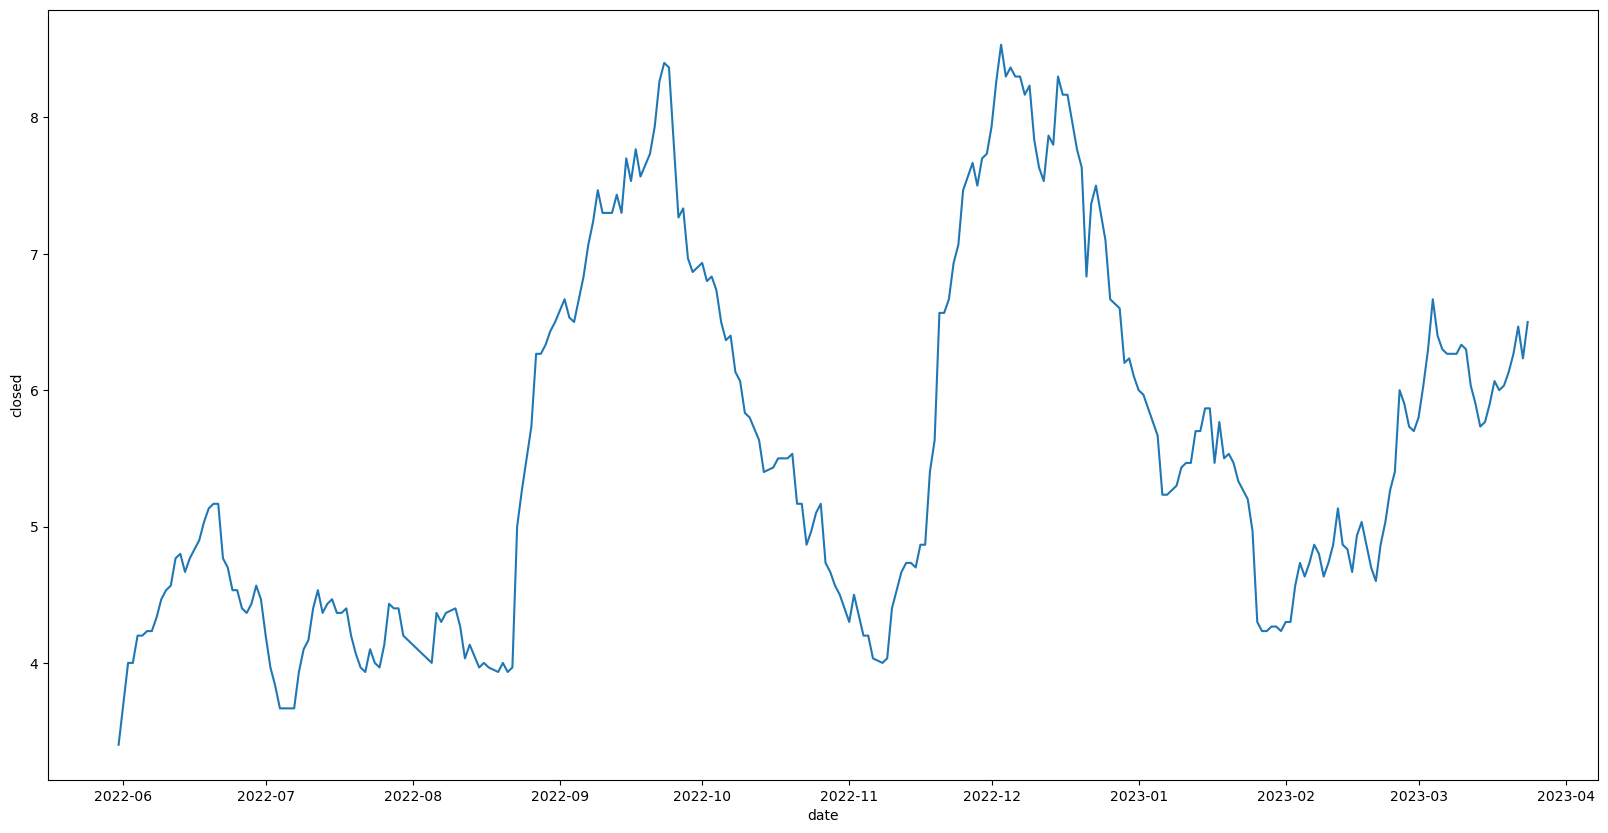

In [28]:
# График количество новых запросов / день. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_closed_po2_6_per_day.date, df_closed_po2_6_per_day.closed.rolling(window=30).mean())

In [29]:
# Закрытые ПО-3 / ПО-4 / ПО-5
df_closed_po3_4_5 = df_closed[(df_closed['TQS_Проектный офис']=='UMCD - ПО-3')|  \
                            (df_closed['TQS_Проектный офис']=='UMCD - ПО-4')|  \
                            (df_closed['TQS_Проектный офис']=='UMCD - ПО-5')]
df_closed_po3_4_5.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
80,СПС-UM1-PO5-TQS-00227-CIV.xml,Подрядчик,Доржиев Агван Александрович,СтройПроектСервис,Изменение ширины водоотводной канавы,3-УМ-21-272-РД-00-ГП,27,Общестрой,ЭП7,Энергопроект-7,...,NaN,232,NaN,NaN,Доржиев Агван Александрович,22.03.2023,Элемент,p/um1/TQS,NaN,NaN


In [30]:
# Группировка по дням
df_closed_po3_4_5_per_day = df_closed_po3_4_5.groupby('TQS_Закрыт', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Закрыт' : 'date', 'TQS_Состояние' : 'closed'})
df_closed_po3_4_5_per_day.head(3)

,date,closed
0,2022-05-06,1
1,2022-05-10,1
2,2022-05-14,1


In [31]:
# Медиана по закрытым в день
df_closed_po3_4_5_per_day.closed.median()

3.0

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

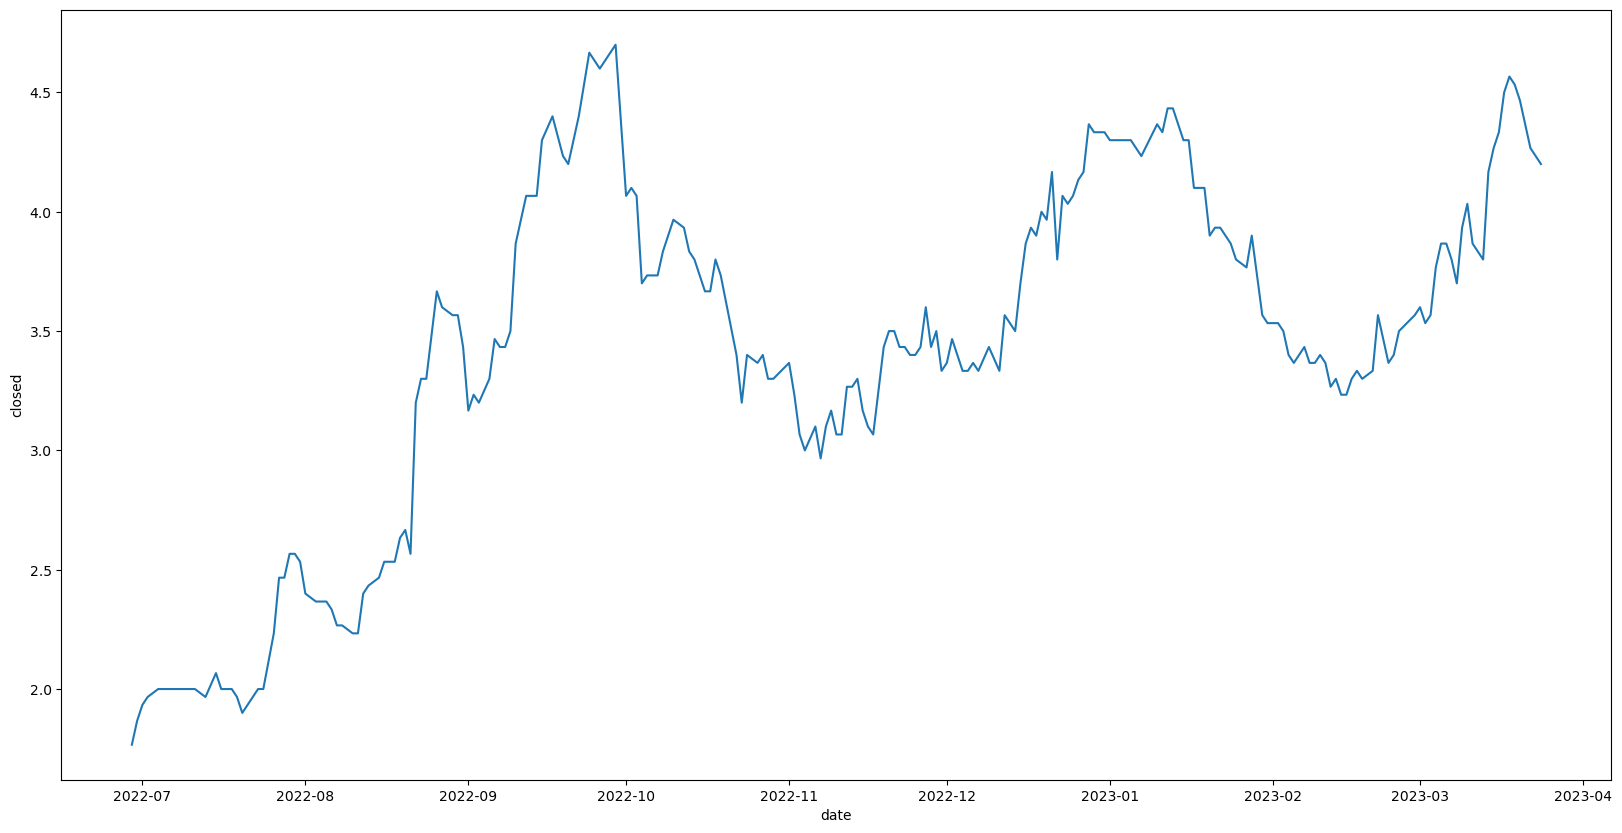

In [32]:
# График количество новых запросов / день. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_closed_po3_4_5_per_day.date, df_closed_po3_4_5_per_day.closed.rolling(window=30).mean())

Расклад по строителям

In [19]:
# Cтроительные запросы
df_civil = df[(df['TQS_Чего касается TQS']=='Архитектурные решения')  \
  |(df['TQS_Чего касается TQS']=='Конструкции металлические')  \
  |(df['TQS_Чего касается TQS']=='Общее') | (df['TQS_Чего касается TQS']=='Общестрой')]
df_civil.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
1,UMCD-UM1-PO4-TQS-03719-CIV.xml,Дирекция по строительству,Радецкий Евгений Геннадьевич,"Дирекция по строительству - ПО-4 - ООО ""Удокан...",разработка технического решения,У1.ГК.05.02-НК,1.4.2,Общестрой,НТЦ,НТЦ Геотехнология,...,NaN,3719,NaN,NaN,Радецкий Евгений Геннадьевич,08.04.2023,Элемент,p/um1/TQS,NaN,NaN


In [20]:
# Срок ответов / среднее арифметическое
df_civil['Длительность отработки запроса'].mean()

11.254455717027694

In [21]:
# Срок ответов / медиана
df_civil['Длительность отработки запроса'].median()

6.0

In [22]:
# Закрытые
df_civil_closed = df_civil.query("TQS_Состояние=='Закрыт'")
df_civil_closed.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
6,RHI-UM1-PO6-TQS-03573-CIV.xml,Подрядчик,Астафьева Ульяна Николаевна,Ренейссанс Хэви Индастрис,О замене материала касательно металлических пе...,260719-ВП-19.11-АР,19.10,Общестрой,SMA,СМАРТ-инжиниринг,...,NaN,3576,NaN,NaN,Астафьева Ульяна Николаевна,08.04.2023,Элемент,p/um1/TQS,NaN,NaN


In [23]:
# Группировка по дням закрытые
df_civil_closed_per_day = df_civil_closed.groupby('TQS_Закрыт', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Закрыт' : 'date', 'TQS_Состояние' : 'closed'})
df_civil_closed_per_day.head(3)

,date,closed
0,2022-04-01,1
1,2022-04-05,2
2,2022-04-07,1


C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='closed'>

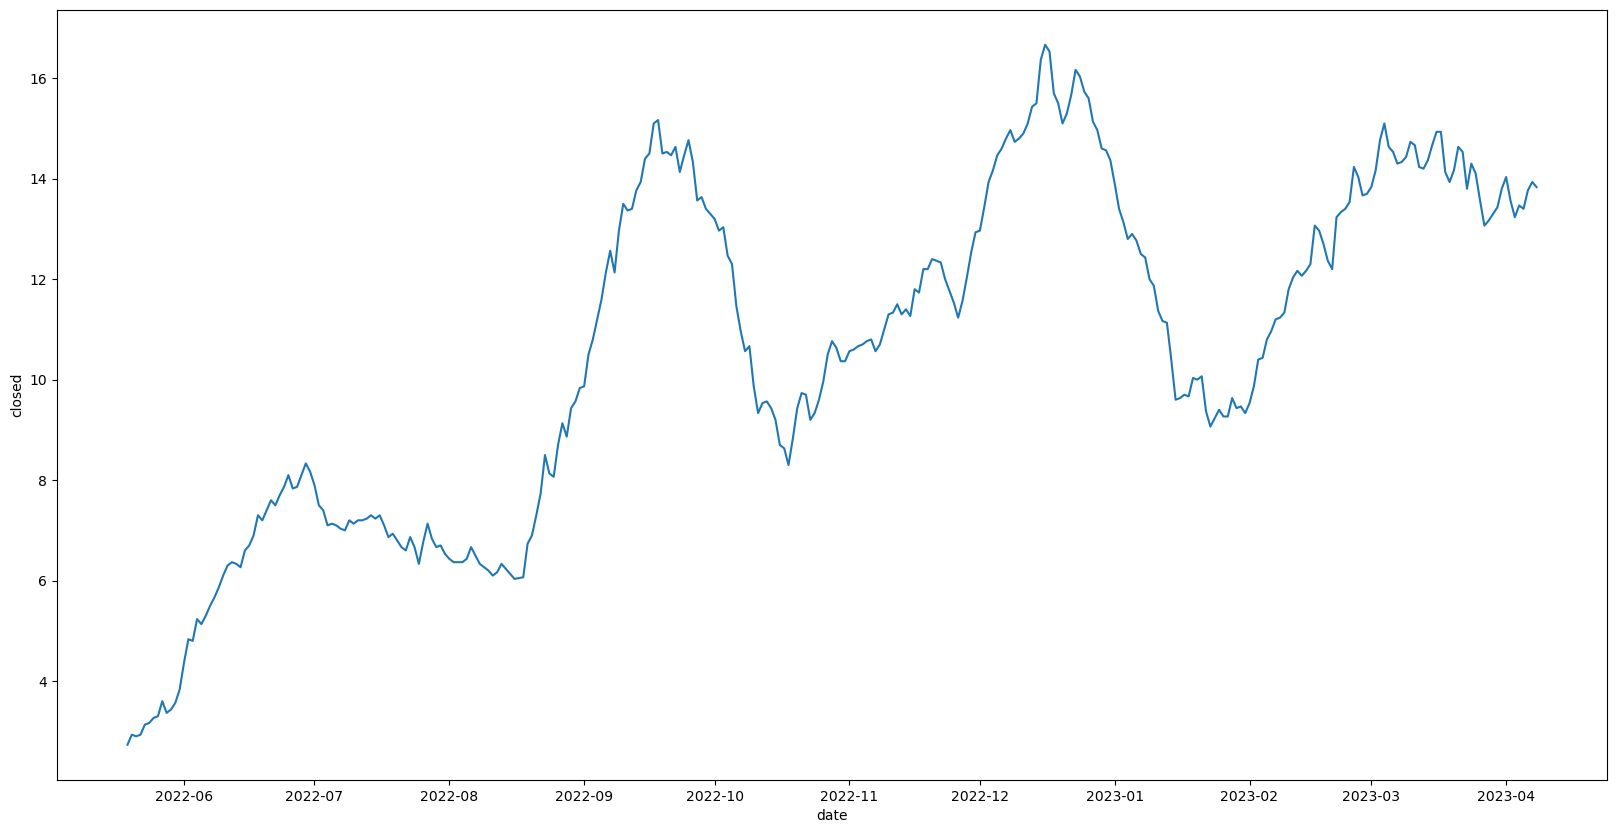

In [24]:
# График количество закрытых запросов / день. Через скользящее окно. Закрытые
plt.figure(figsize=(20, 10))
sns.lineplot(df_civil_closed_per_day.date, df_civil_closed_per_day.closed.rolling(window=30).mean())

In [39]:
# Группировка по дням новые
df_new_per_day_civil = df_civil.groupby('TQS_Создан', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Создан' : 'date', 'TQS_Состояние' : 'new'})
df_new_per_day_civil.head(3)

,date,new
0,2022-03-31,5
1,2022-04-01,7
2,2022-04-02,1


C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new'>

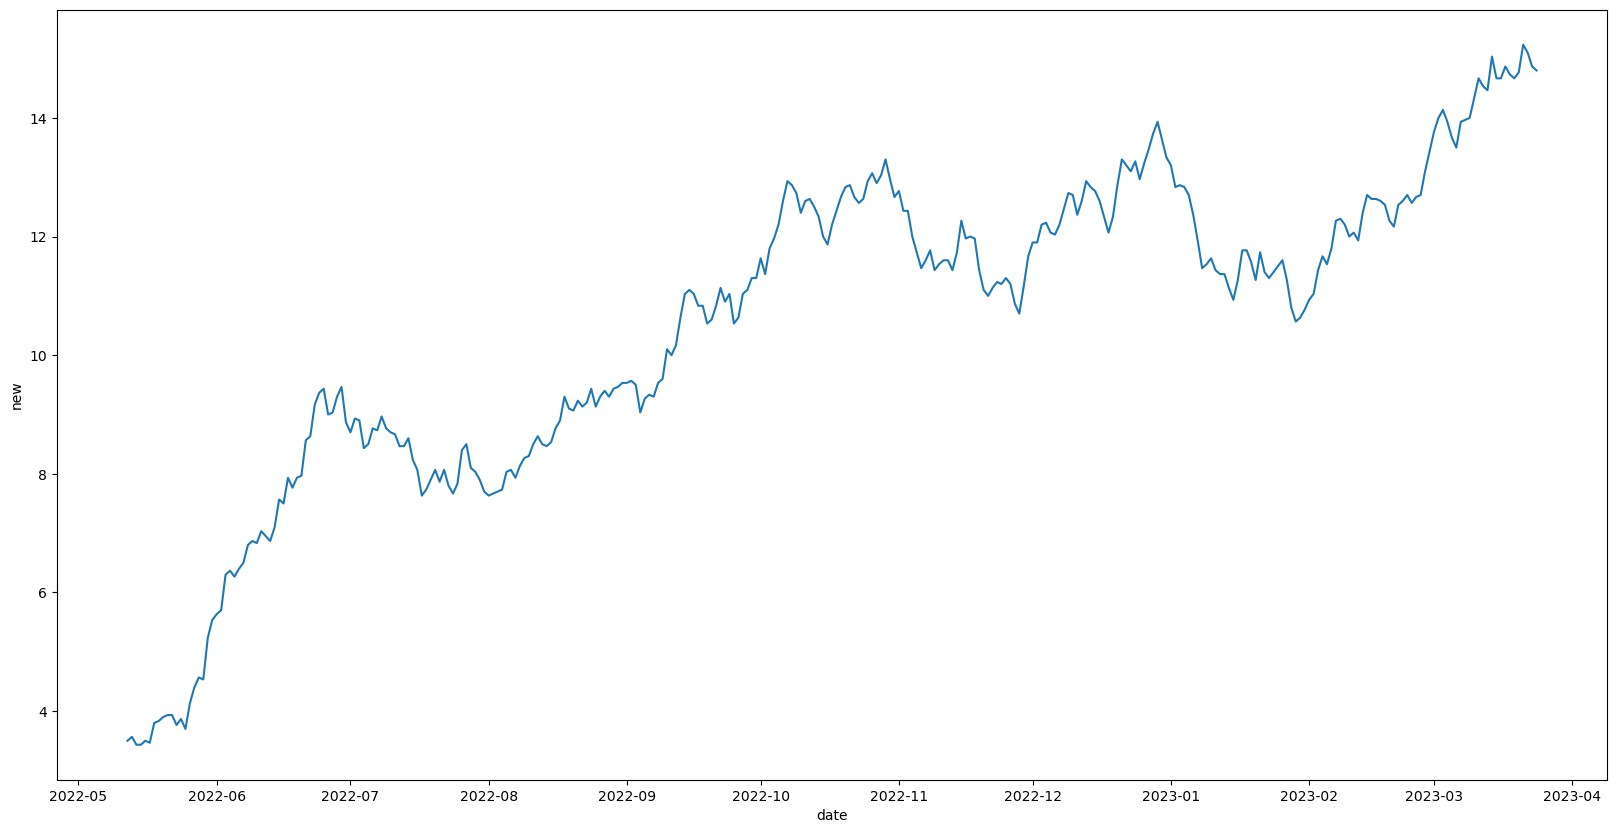

In [40]:
# График количество новых запросов / день. Через скользящее окно. Новые
plt.figure(figsize=(20, 10))
sns.lineplot(df_new_per_day_civil.date, df_new_per_day_civil.new.rolling(window=30).mean())

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new'>

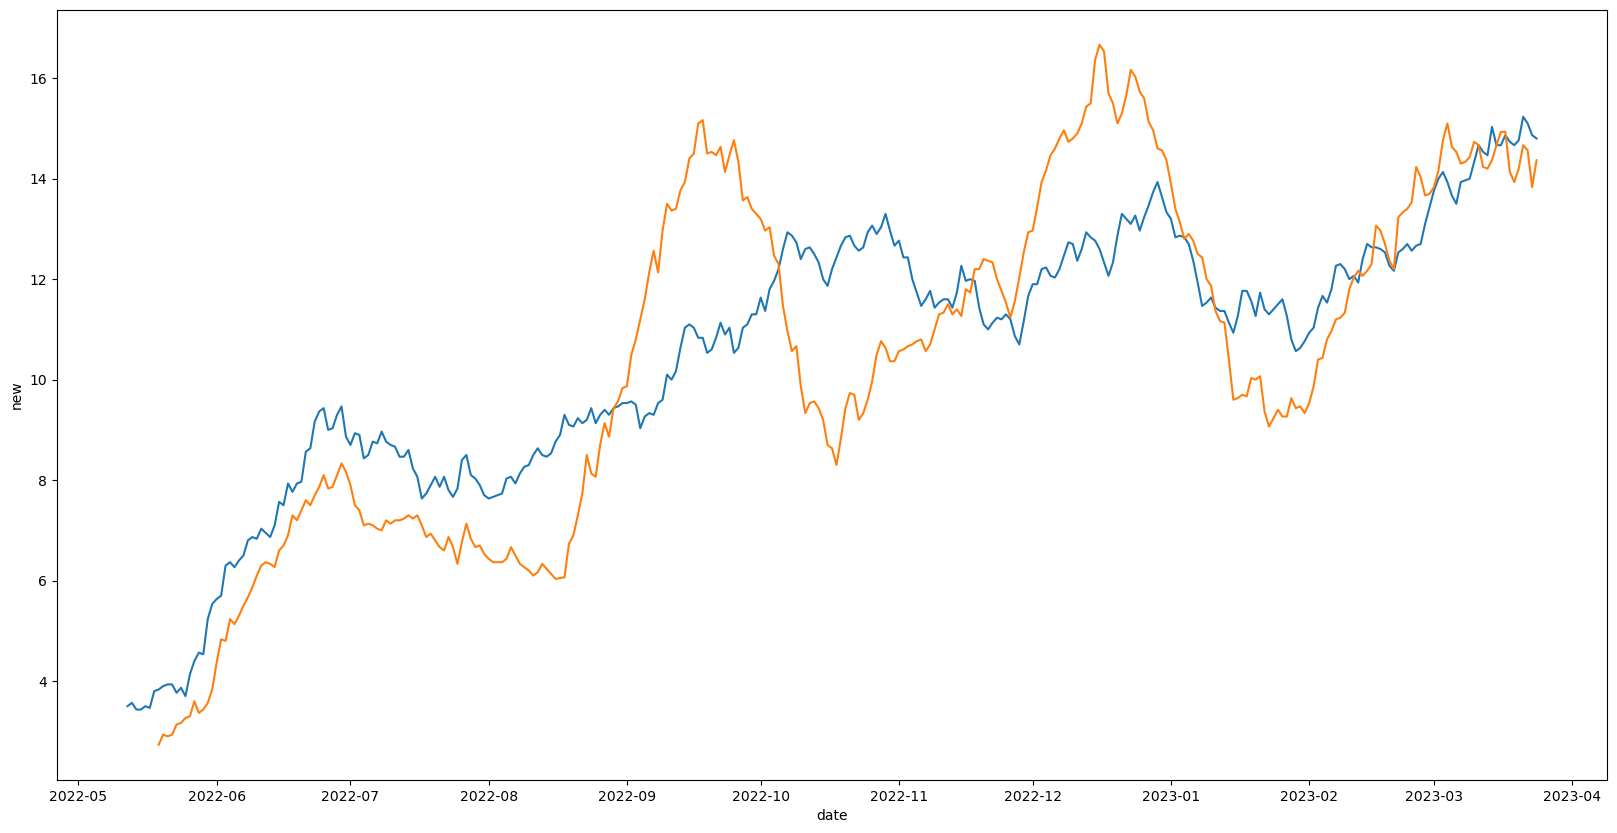

In [50]:
# Графика новые + закрытые
plt.figure(figsize=(20, 10))
sns.lineplot(df_new_per_day_civil.date, df_new_per_day_civil.new.rolling(window=30).mean())
sns.lineplot(df_civil_closed_per_day.date, df_civil_closed_per_day.closed.rolling(window=30).mean())

Расклад по новым запросам от ОД

In [25]:
# Создание дф
df_od = df[df['TQS_Инициатор']=='Операционная дирекция']
df_od.head(1)

,Имя,TQS_Инициатор,TQS_ФИО Инициатор,TQS_Организация,TQS_Тема запроса,TQS_Номер комплекта РД,TQS_Номер по генплану,TQS_Чего касается TQS,TQS_РПИ,TQS_РПИ_наименование,...,Прогноз ответа РПИ (корректировка РД),ID_number_initiator,TQS_Был в РПИ,TQS_Причина отклонения,Кем создано,TQS_Дата создания,Тип элемента,Путь,TQS_Факт закрытия TQS,TQS_Номер TQS
5,UMOD-UM1-PO1-TQS-03717-EQP.xml,Операционная дирекция,Хулапов Сергей Владимирович,"Операционная дирекция - ООО ""Удоканская Медь""",Разработать РД на установку и трубную обвязку ...,У1.ТК.04.03-3705-5.3-ТХ.СТ,5.03,Оборудование,МЕХ,Механобр инжиниринг,...,NaN,3717,NaN,NaN,Хулапов Сергей Владимирович,08.04.2023,Элемент,p/um1/TQS,NaN,NaN


In [26]:
# Группировка по дням новые ОД
df_new_per_day_od = df_od.groupby('TQS_Создан', as_index = False).agg({'TQS_Состояние' : 'count'})  \
    .rename(columns={'TQS_Создан' : 'date', 'TQS_Состояние' : 'new'})
df_new_per_day_od.head(3)

,date,new
0,2022-10-08,3
1,2022-10-10,2
2,2022-10-11,1


C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='new'>

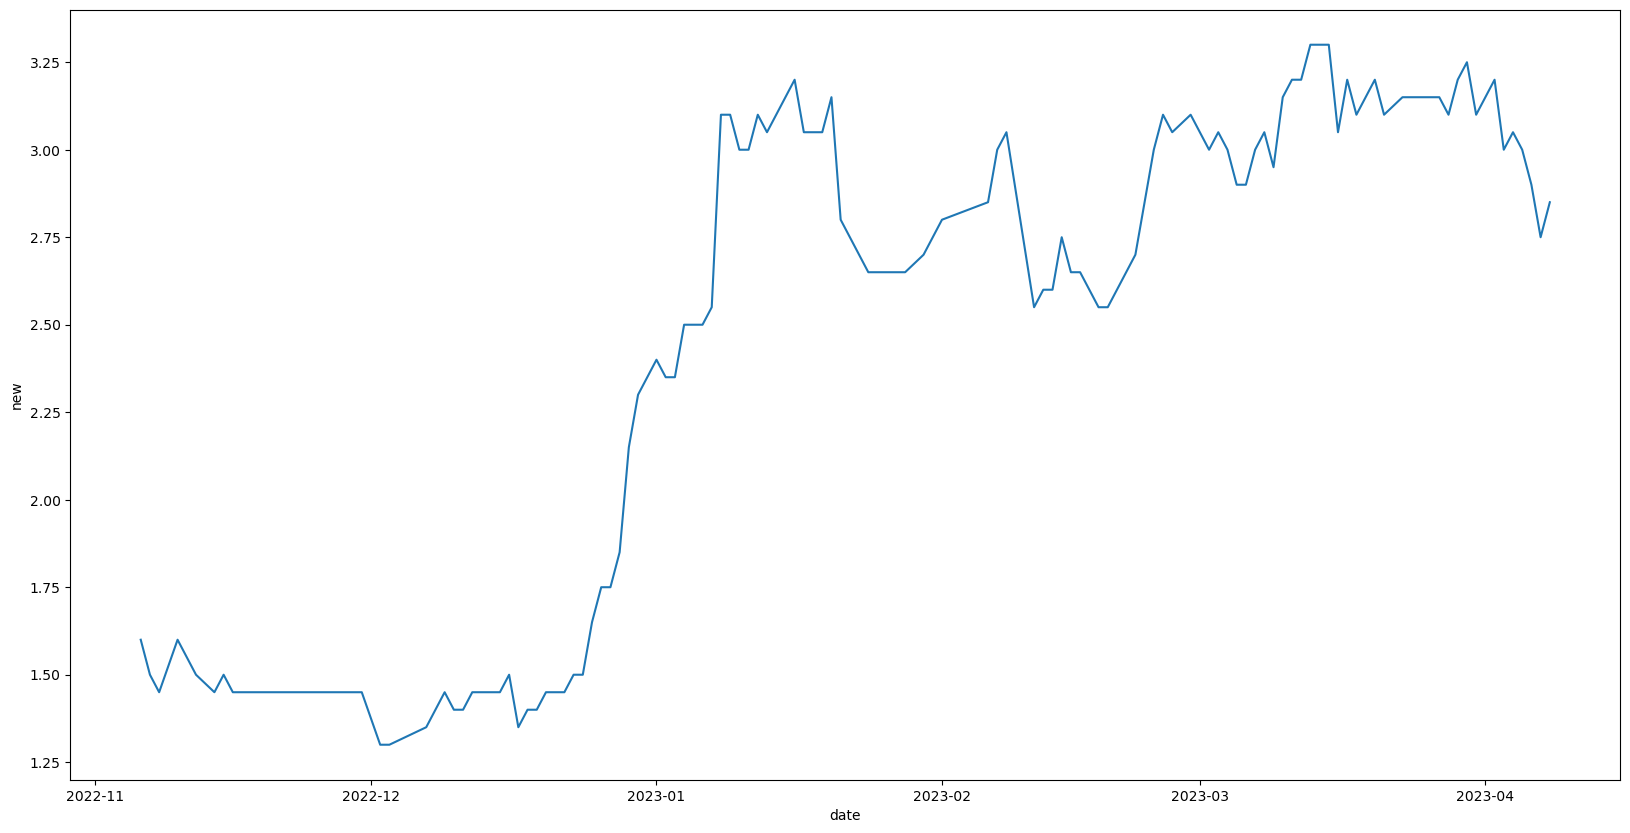

In [27]:
# График количество новых запросов / день. Через скользящее окно. Новые
plt.figure(figsize=(20, 10))
sns.lineplot(df_new_per_day_od.date, df_new_per_day_od.new.rolling(window=20).mean())

In [28]:
# Медиана новых в день
df_new_per_day_od.new.median()

2.0

РАСКЛАД ПО НЕДЕЛЯМ

In [7]:
# Группировка по неделям НОВЫЕ запросы.
week_resample_new_sum = df.sort_values('TQS_Создан').set_index('TQS_Создан').resample(rule='W').Имя.count()  \
        .reset_index().rename(columns = {'Имя' : 'new', 'TQS_Создан' : 'week'})
week_resample_new_sum.head(1)

,week,new
0,2022-04-03,15


C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='new'>

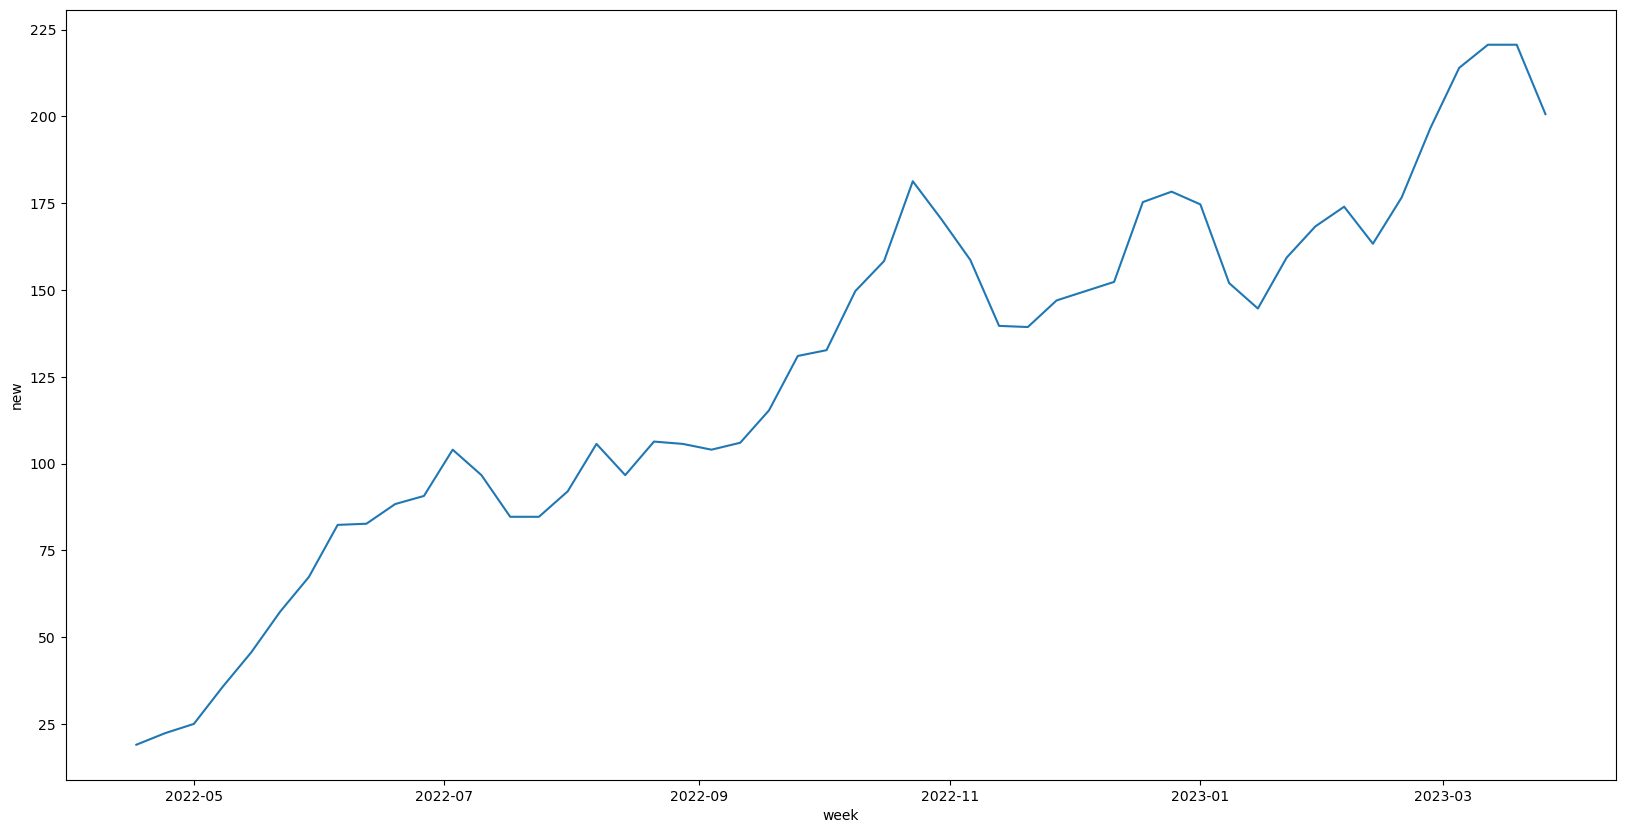

In [8]:
# График количество новых запросов / неделя. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(week_resample_new_sum.week, week_resample_new_sum.new.rolling(window=3).mean())

In [9]:
# Группировка по неделям ЗАКРЫТЫЕ запросы.
week_resample_closed_sum = df_closed.sort_values('TQS_Закрыт').set_index('TQS_Закрыт').resample(rule='W').Имя.count()  \
        .reset_index().rename(columns = {'Имя' : 'closed', 'TQS_Закрыт' : 'week'})
week_resample_closed_sum.head(1)

,week,closed
0,2022-04-03,1


C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='closed'>

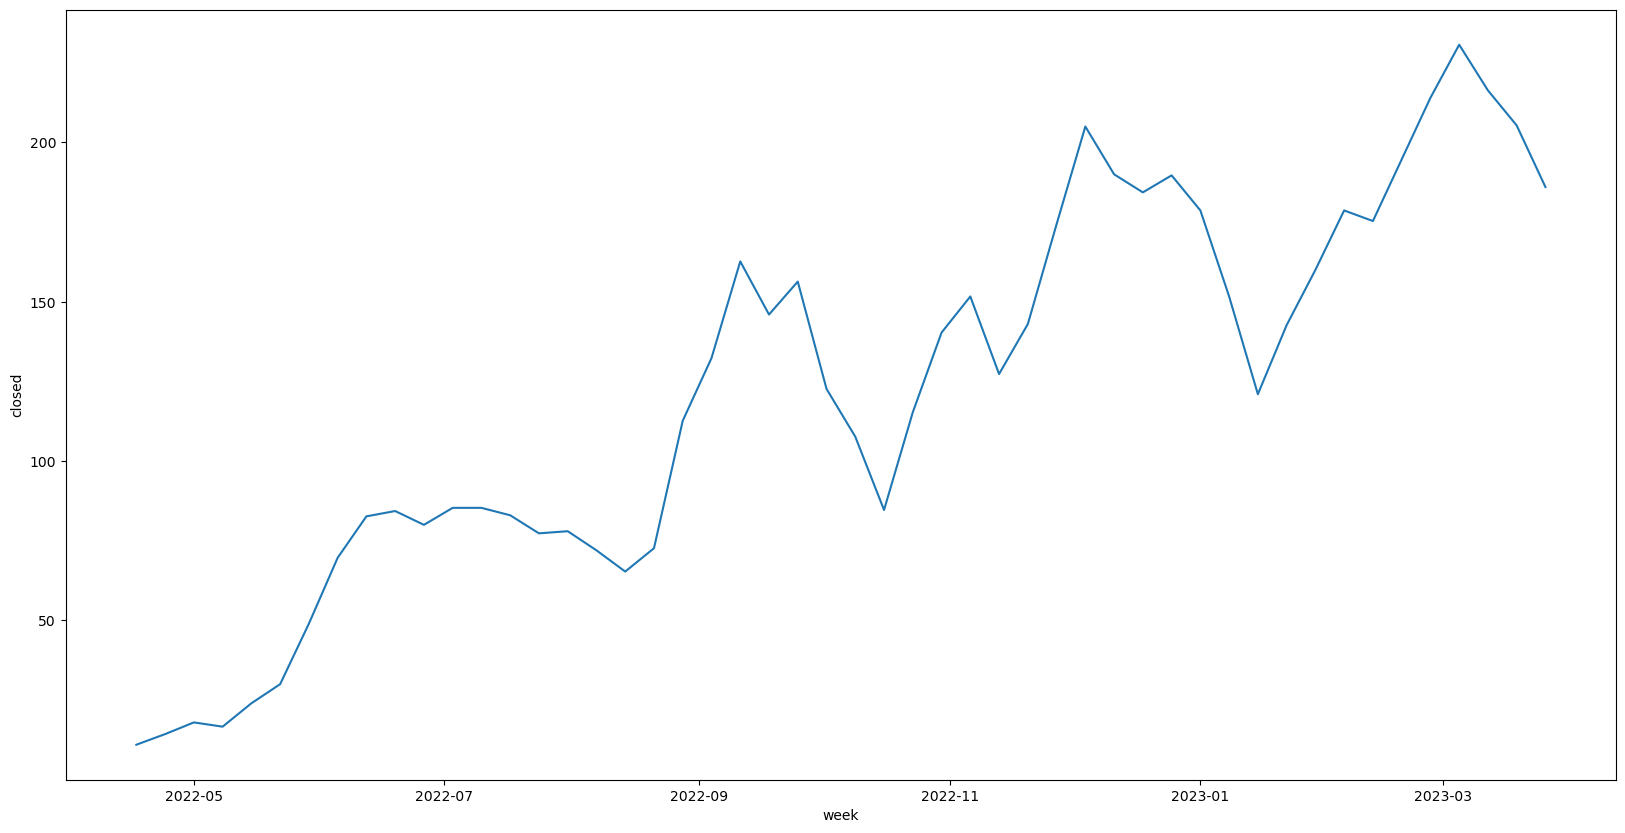

In [10]:
# График количество ЗАКРЫТЫХ запросов / неделя. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(week_resample_closed_sum.week, week_resample_closed_sum.closed.rolling(window=3).mean())

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'df_week' is not defined

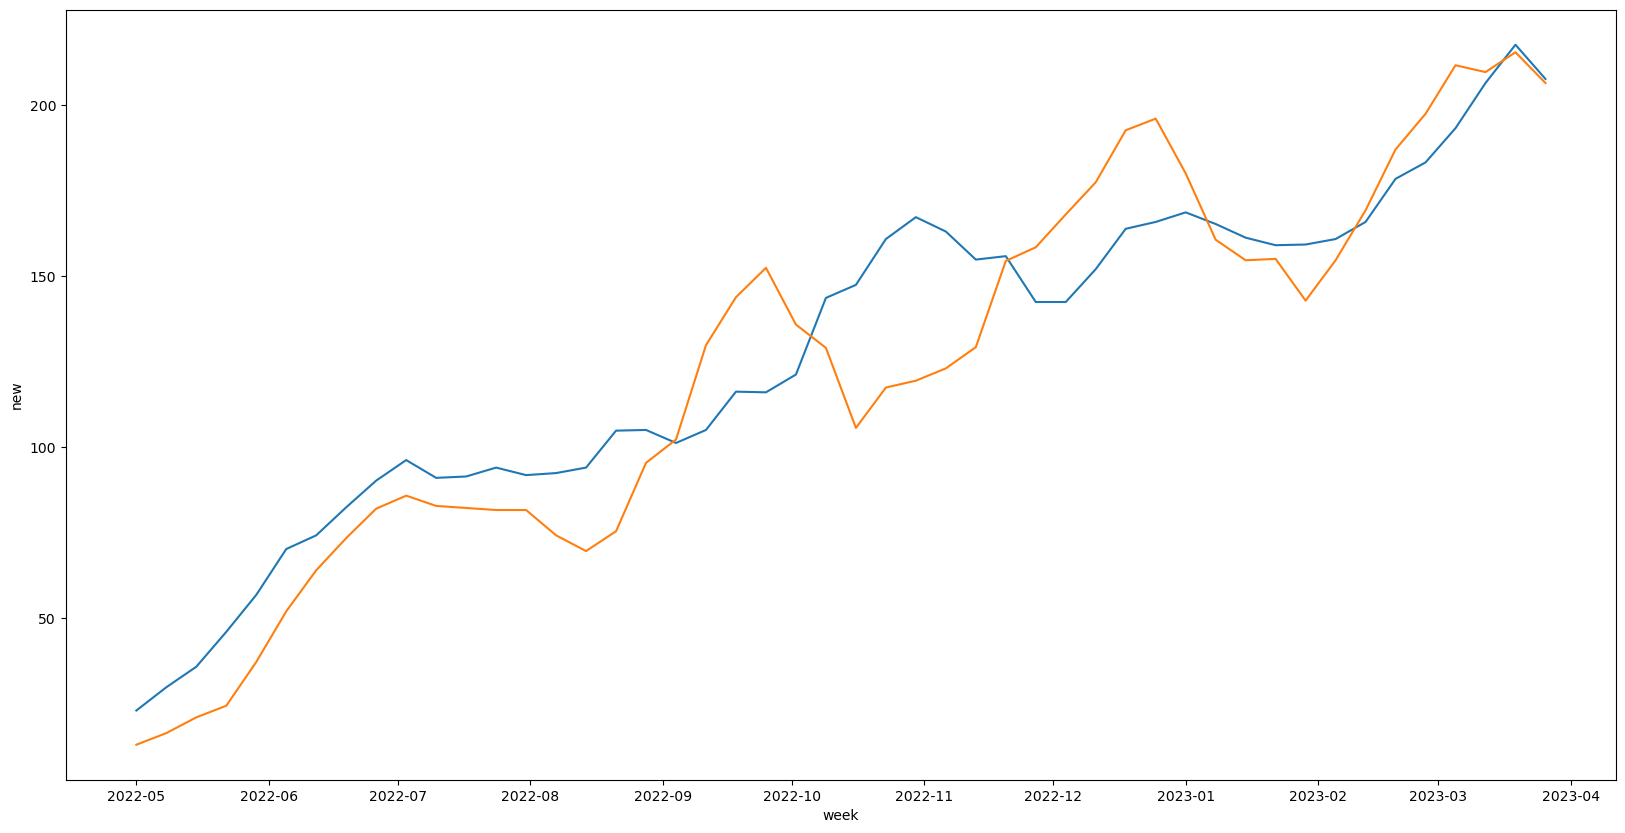

In [12]:
# Наложение Недельные НОВЫЕ / ЗАКРЫТО. + Разница закрытых 
plt.figure(figsize=(20, 10))
sns.lineplot(week_resample_new_sum.week, week_resample_new_sum.new.rolling(window=5).mean())
sns.lineplot(week_resample_closed_sum.week, week_resample_closed_sum.closed.rolling(window=5).mean())
sns.lineplot(df_week.week, df_week.dif.rolling(window=5).mean())

In [13]:
# Объединили недельные результаты
df_week = pd.merge(week_resample_closed_sum, week_resample_new_sum, how='inner', on='week')
df_week.head(1)

,week,closed,new
0,2022-04-03,1,15


In [14]:
# Новая колонка с разницей
df_week = df_week.assign(dif = df_week.closed - df_week.new)
df_week.head(1)

,week,closed,new,dif
0,2022-04-03,1,15,-14


In [18]:
df_week.to_csv('dif.csv', index = False)

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='dif'>

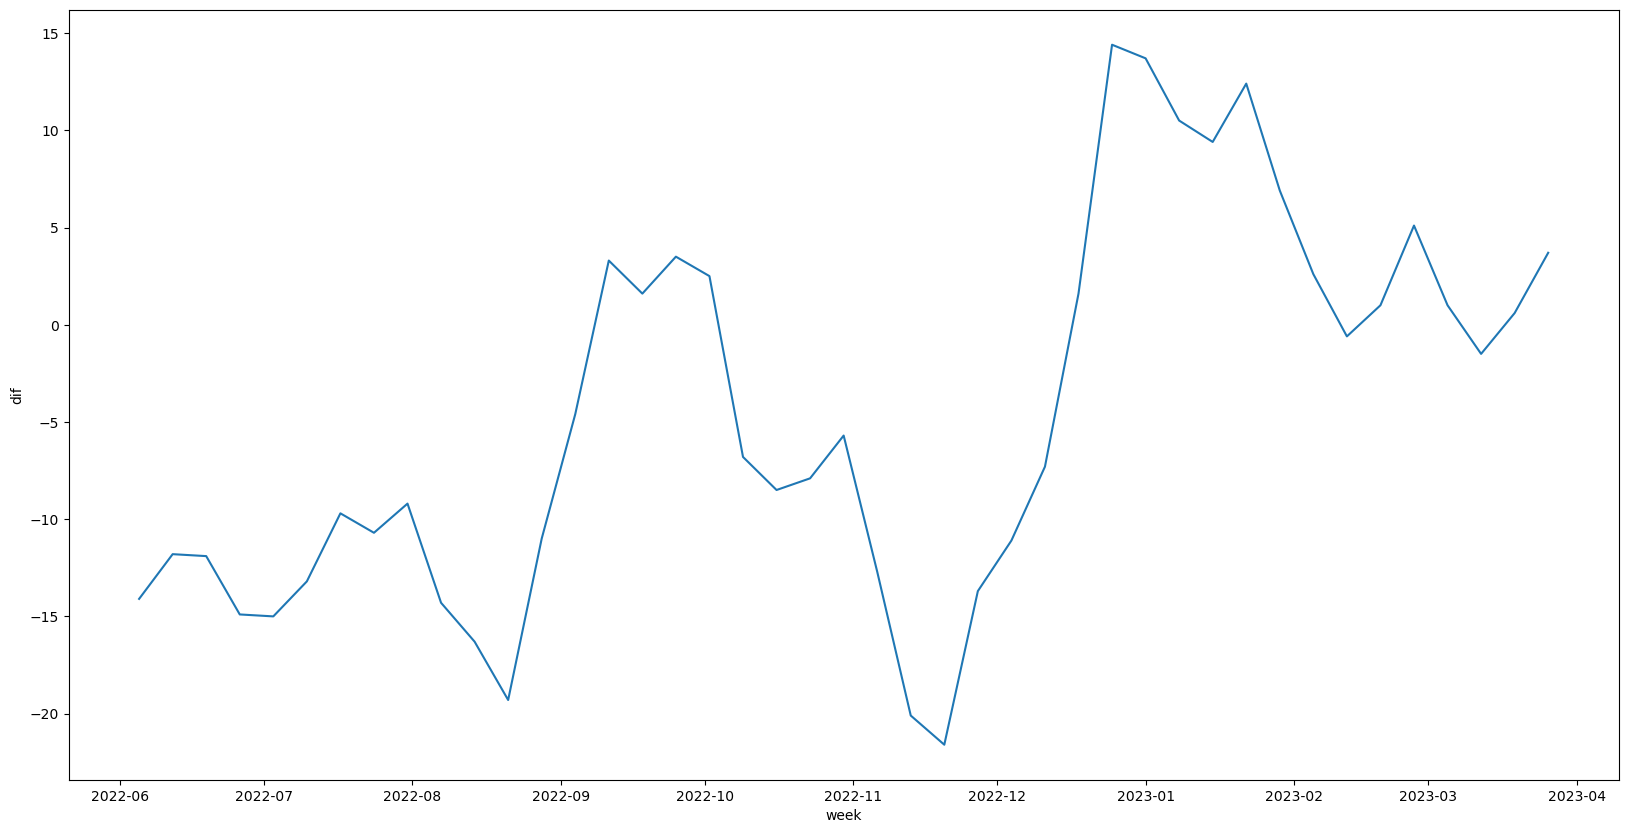

In [15]:
# График разница закрытые / новые. Через скользящее окно
plt.figure(figsize=(20, 10))
sns.lineplot(df_week.week, df_week.dif.rolling(window=10).mean())

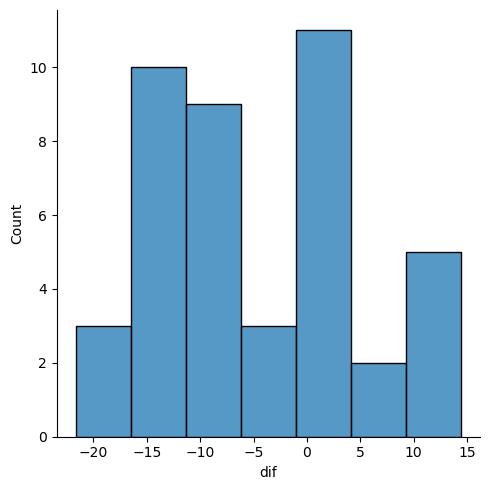

In [121]:
# График разница закрытые / новые. Столбчатый
sns.displot(df_week.dif.rolling(window=10).mean())

In [113]:
# Разница ответы / новые. Среднее арифметическое
df_week.dif.mean()

-4.884615384615385

In [114]:
# Разница ответы / новые. Медиана
df_week.dif.median()

-10.5

# Задача новая

In [47]:
# Общие данные
week = pd.Series(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
day_1 = '2023-03-04'
day_2 = '2023-03-12'
day_3 = '2023-03-11'
day_4 = '2023-03-19'
cw = 'cw_11'

C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Kucher\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


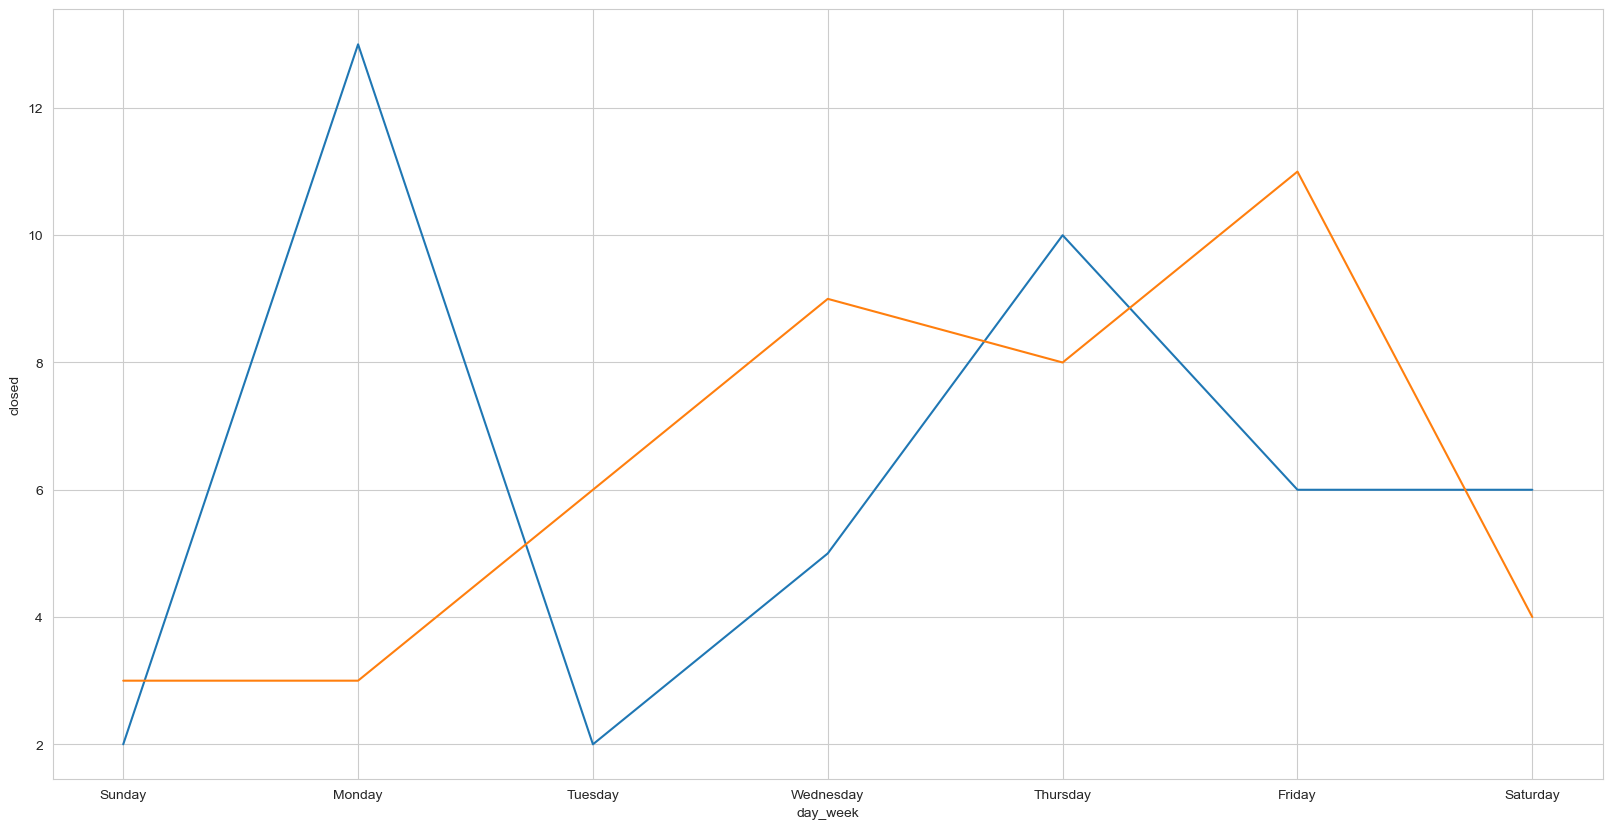

In [51]:
# Электрика
df_closed_ele = df_closed[df_closed['TQS_Чего касается TQS']=='Электрика']
df_closed_ele_per_day = df_closed_ele.sort_values('TQS_Закрыт').set_index('TQS_Закрыт').resample(rule='D').Имя.count()  \
        .reset_index().rename(columns = {'Имя' : 'closed', 'TQS_Закрыт' : 'day'})
week_last =    df_closed_ele_per_day[(df_closed_ele_per_day.day>day_1)&(df_closed_ele_per_day.day<day_2)]
week_current = df_closed_ele_per_day[(df_closed_ele_per_day.day>day_3)&(df_closed_ele_per_day.day<day_4)]
week_last.reset_index(drop= True , inplace= True)
week_current.reset_index(drop= True , inplace= True)
week_current = week_current.assign(day_week = week)
week_last = week_last.assign(day_week = week)
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
sns.lineplot(week_current.day_week, week_current.closed.rolling(window=1).mean())
sns.lineplot(week_last.day_week, week_last.closed.rolling(window=1).mean())
plt.savefig(f'ELE_{cw}.jpg')